# Exploratory data analysis (EDA)

In [10]:
# import some packages
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd

In [11]:
data = pd.read_csv('ps_usable_hydrogen_storage_capacity_gcmcv2.csv')
data.head(3)

,Name,CSD refc.,DB Acr.,GT,Calc. Type,Density,GSA,VSA,VF,PV,LCD,PLD,UG at PS,UV at PS,Source,CSFT,CSA
0,DAKXOE_CSD17,DAKXOE,CSD17,Real,Grand Canonical Monte Carlo,0.24,7698,1872,0.90,3.72,12.4,10.6,13.4,39.9,DOI: 10.1021/acs.chemmater.7b00441,CIF (Not P1 Symmetry),Not open source
1,ENAPAL_CSD17,ENAPAL,CSD17,Real,Grand Canonical Monte Carlo,0.48,6108,2920,0.86,1.80,8.4,7.3,7.4,39.9,DOI: 10.1021/acs.chemmater.7b00441,CIF (Not P1 Symmetry),Not open source
2,BIVVEI_CSD17,BIVVEI,CSD17,Real,Grand Canonical Monte Carlo,0.37,6827,2545,0.89,2.39,11.4,10.0,9.3,39.8,DOI: 10.1021/acs.chemmater.7b00441,CIF (Not P1 Symmetry),Not open source


## Information about the data
This dataset contains 98,694 different MOFs with 7 structural properties and usable gravimetric storage capacity (UG) and usable volumetric storage capacity (UV) to measure the hydrogen storage capacity of each MOF. 

Structural properties (abbreviation and full form) and their units are provided as follows:

Property (abbr.) | Property (full) | unit
--- | --- | ---
| Density | g/cm3
GSA | Gravimetric surface area | m2/g
VSA | Volumetric surface area | m2/cm3
VF | Void fracion | 
PV | Pore volumn |
LCD | Largest cavity diameter | ai
PLD | Pore limiting diameter | ai

In [12]:
# check the size of the loaded data 
assert(data.shape[0] == 98694)
assert(data.shape[1] == 17)

In [4]:
# find that the name of columns have extra space in the end
data.columns

Index(['Name ', 'CSD refc. ', 'DB Acr. ', 'GT ', 'Calc. Type ', 'Density ',
       'GSA ', 'VSA ', 'VF ', 'PV ', 'LCD ', 'PLD ', 'UG at PS ', 'UV at PS ',
       'Source ', 'CSFT ', 'CSA '],
      dtype='object')

In [5]:
data = data.rename(columns=lambda x: x.rstrip()) # delete the extra space in the end and check it again
data = data.rename(columns={'UG at PS':'UG', 'UV at PS': 'UV'})
data.columns

Index(['Name', 'CSD refc.', 'DB Acr.', 'GT', 'Calc. Type', 'Density', 'GSA',
       'VSA', 'VF', 'PV', 'LCD', 'PLD', 'UG', 'UV', 'Source', 'CSFT', 'CSA'],
      dtype='object')

In [6]:
def single_feature_plot(single_feature):
    # check that the input single_feature has type of str
    try:
        assert(type(single_feature) == str)
    except:
        raise TypeError('not string')
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
    ax1.scatter(data[single_feature], data['UG'])
    ax1.set_xlabel(single_feature, fontsize = 15)
    ax1.set_ylabel('UG',fontsize = 15)
    ax1.set_title('Relationship between '+single_feature+ ' and UG', fontsize = 15)
    ax2.scatter(data[single_feature], data['UV'])
    ax2.set_xlabel(single_feature, fontsize = 15)
    ax2.set_ylabel('UV', fontsize = 15)
    ax2.set_title('Relationship between '+single_feature+ ' and UV', fontsize = 15)

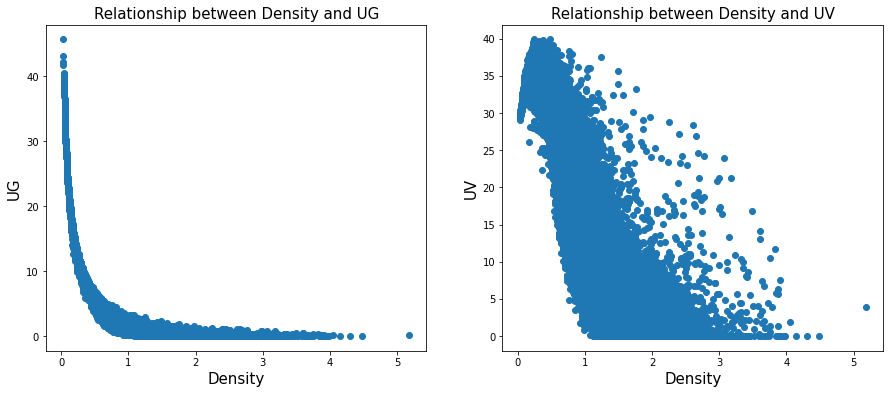

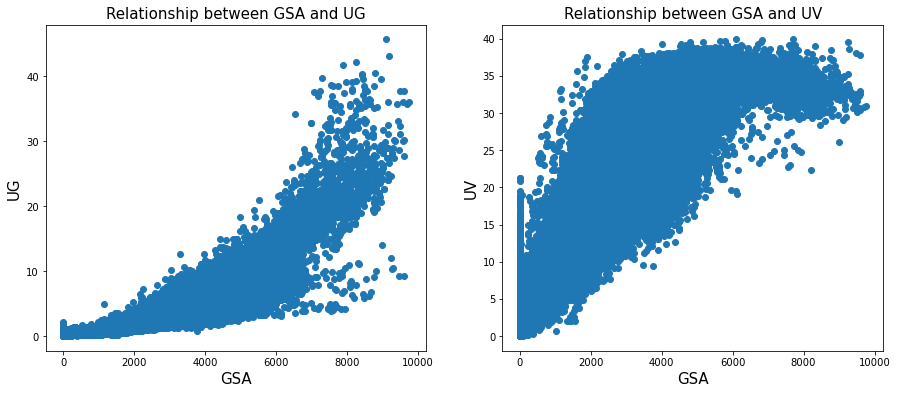

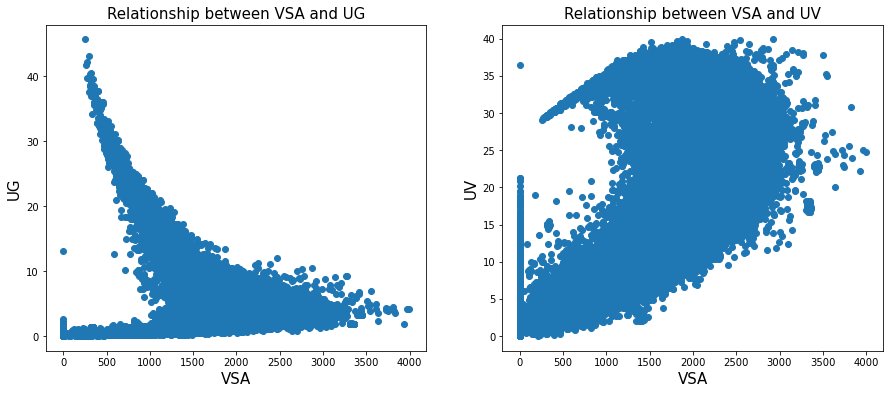

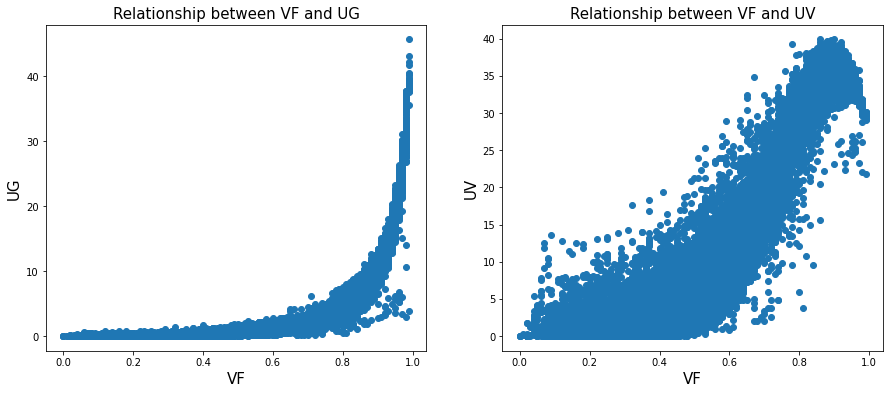

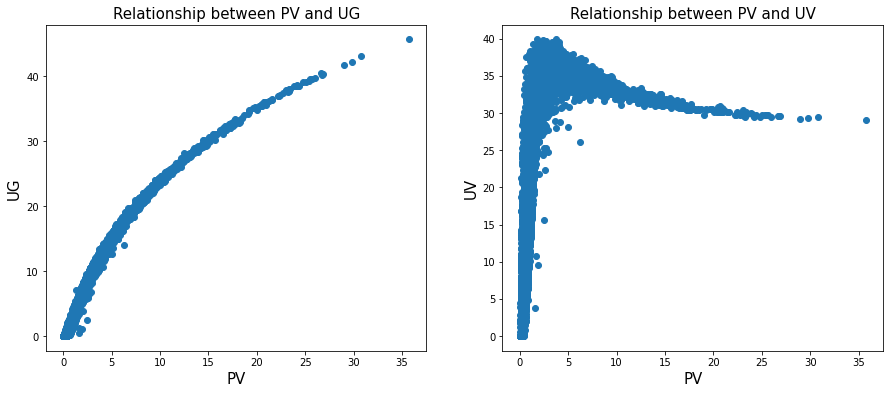

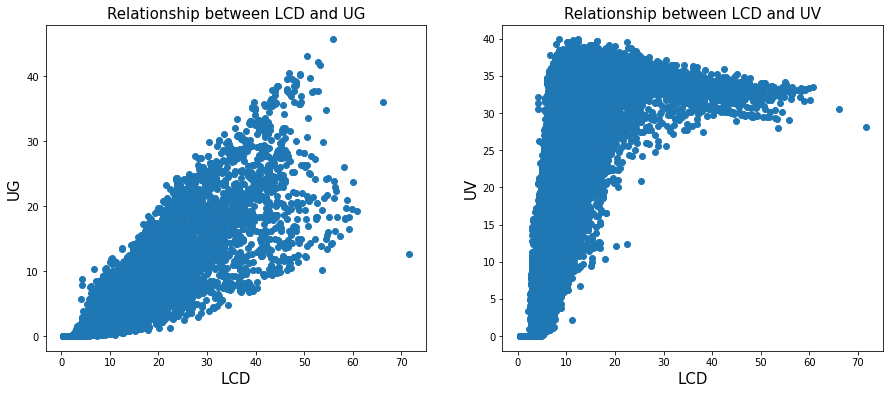

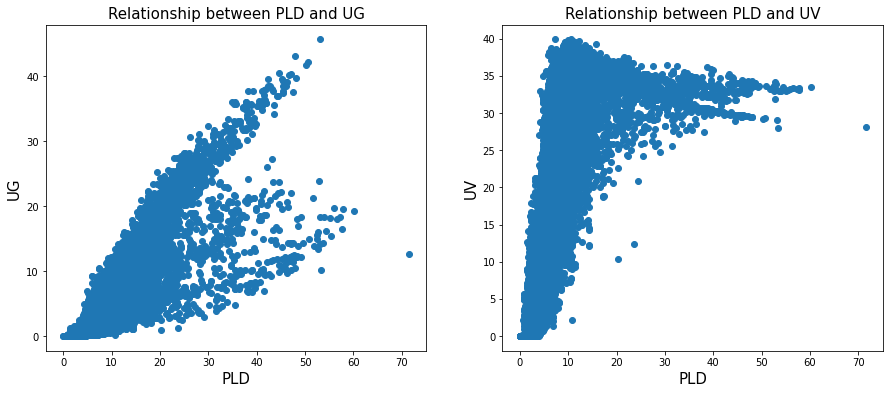

In [7]:
features_name = data.columns[5:12]
for single_feature in features_name:
    single_feature_plot(single_feature)

In [8]:
# get rid of those structure with small VSA and GSA (those structures are possiblely problematic)
data = data.drop(data[data['VSA'] < 5].index)
data = data.drop(data[data['GSA'] < 5].index)
data.shape

(88464, 17)

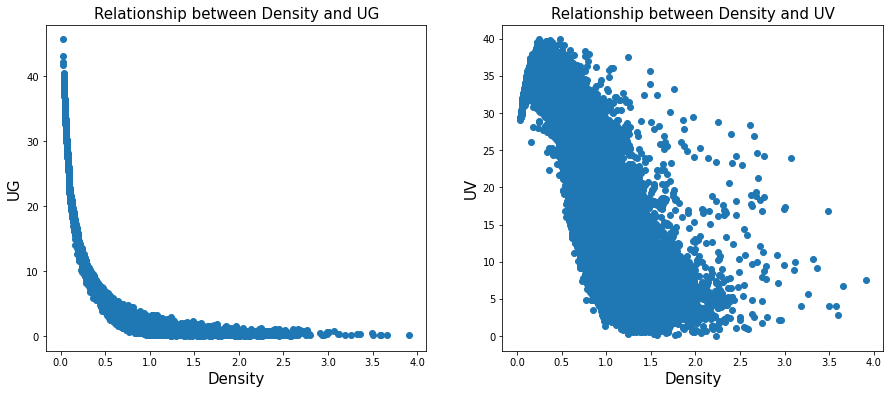

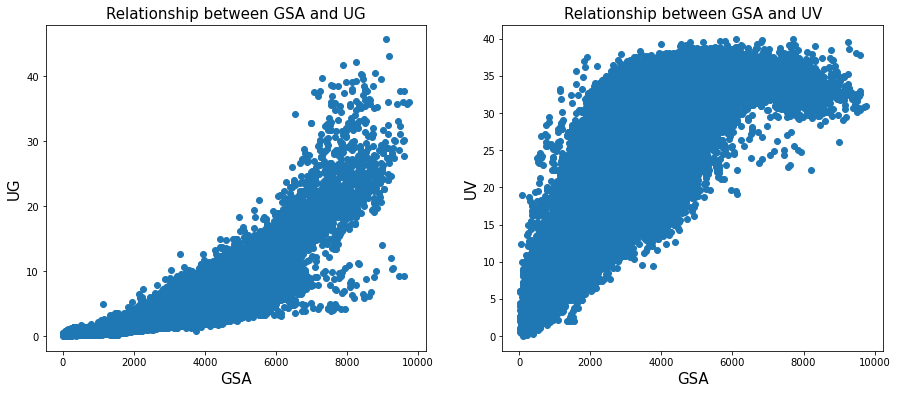

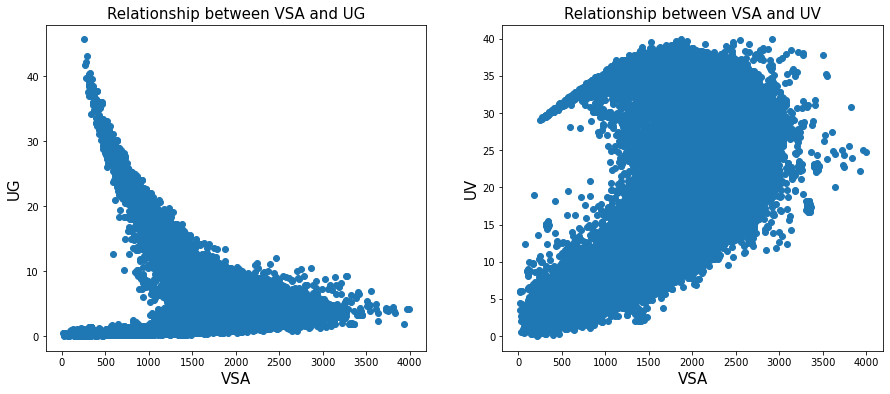

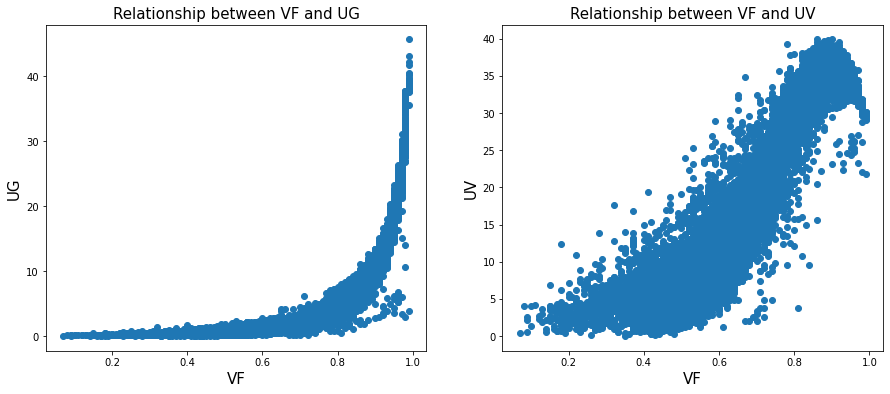

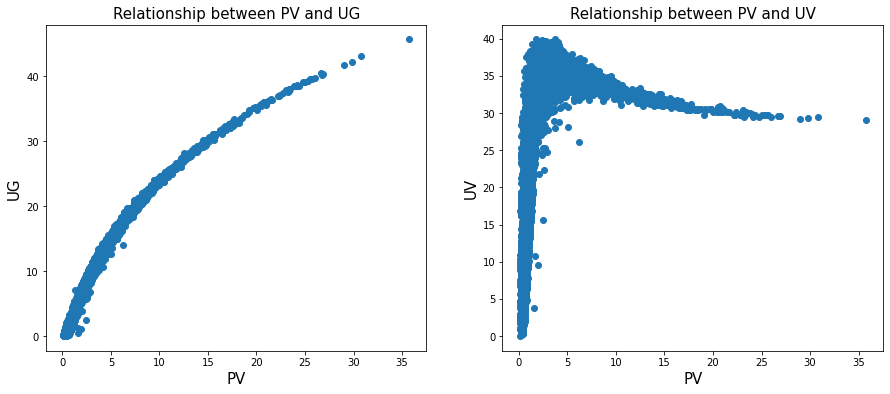

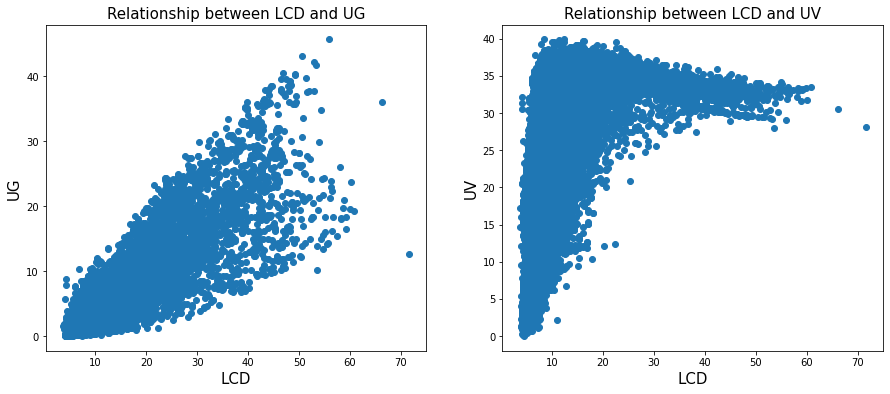

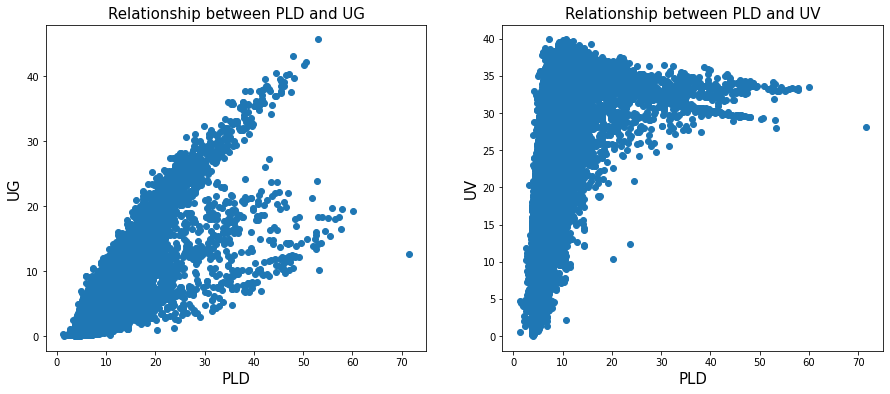

In [9]:
for single_feature in features_name:
    single_feature_plot(single_feature)